# Setup

In [31]:
# setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import rpy2

In [30]:
%load_ext rpy2.ipython

# Data Visualization ― week 4

![](images/vpprek2s4ws31.png.webp)

## Example 1: Napoleon's Russian Campaign

![](images/russian_campaign.png)

Source: Minard
[1869]|

## Example 2: Strong Openers and Late Bloomers

![](images/Day57-945x324.png)

Source:
http://projects.susielu.com/box-office

# Graphical excellence and time-related data

![](images/time_and_ideas.png)

Source: Tufte [2001]

*"graphical excellence is the well-designed presentation of interesting data ― a
matter of substance, statistics, and of design"*

*"graphical excellence
consists of complex ideas communicated with clarity, precision, and efficiency"*
Tufte [2001, p.51]

# How does time matter for data visualization?

Plausible visualization goals ― we may want to show:

* change in a continuos
variable
* change in a qualitative (i.e., categorical) variable
* inter-temporal
patterns of events
* connections among events

Possible analytical approaches to investigate time-related variables:

* within-
case approach
* comparative, within & between-case approach

# The simplest form of chart involving 'time': The single time-series
![](images/20150418_WBC823_0.png)

# Multiple time-series: Moving toward the 'within & between' approach
![](images/import_export.png)

# How do we represent $N$ time series in a chart?

In [19]:
# simulate multiple populations of start-ups

# params
# --------------------------

# set seed
np.random.seed(666)

# periods
p = 11

# sub-population size
s = 1000

# simulation 
# -------------------------
# exponentional growth
e = []

for i in range(s):
    for j in np.arange(1, p, 1):
        r = np.exp(j) * np.random.uniform(0.1, 1)
        e.append([i, j, r, 'e'])
        
        
e = pd.DataFrame(e, columns=['i', 'j', 'r', 'g'])


# inverted-u shape
b1, b2 = 4 * 1000, - 4 * 100

u =[]

for i in range(s):
    for j in np.arange(1, p, 1):
        r = (b1 * j + b2 * j ** 2) * np.random.uniform(0.1, 1)
        u.append([i, j, r, 'u'])

        
u = pd.DataFrame(u, columns=['i', 'j', 'r', 'g'])


# log shape
b = 2000

l = []

for i in range(s):
    for j in np.arange(1, p, 1):
        r = b * np.log(j) * np.random.uniform(0.1, 1)
        l.append([i, j, r, 'l'])


l = pd.DataFrame(l, columns=['i', 'j', 'r', 'g'])


# append data
df = pd.concat([e, u, l], axis=0, )

## Option 1: Dimensionality reduction

In [20]:
# collapse data
c = pd.DataFrame(df.groupby('j', as_index=False)['r'].agg(np.mean))

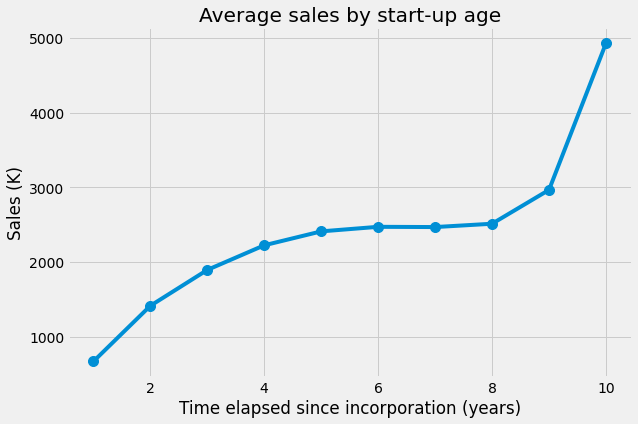

In [21]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
ax = fig.add_subplot(1, 1, 1)

# plot data
x, y = c.j, c.r
ax.plot(x, y, marker='o', markersize=10)

# title
ax.set_title('Average sales by start-up age')

# axes
ax.set_xlabel('Time elapsed since incorporation (years)')
ax.set_ylabel('Sales (K)')

# show plot
plt.show()

## Option 2: Plotting 'everything'

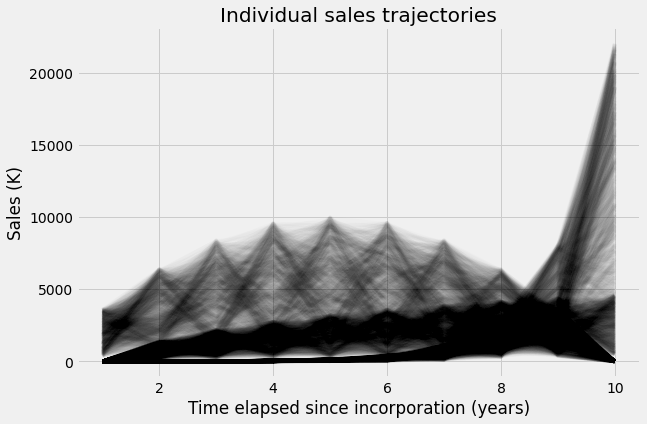

In [22]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
ax = fig.add_subplot(1, 1, 1)

# plot data
x = np.arange(1, 11, 1)

for i in range(s):
    for j in ['e', 'u', 'l']:
        y = df.loc[(df['i'] == i) & (df['g'] == j)]['r'].values
        ax.plot(x, y, color='k', alpha=0.01)

# title
ax.set_title('Individual sales trajectories')

# axes
ax.set_xlabel('Time elapsed since incorporation (years)')
ax.set_ylabel('Sales (K)')
        
# show plot
plt.show()

## Option 3: Plotting prototypical trajectories

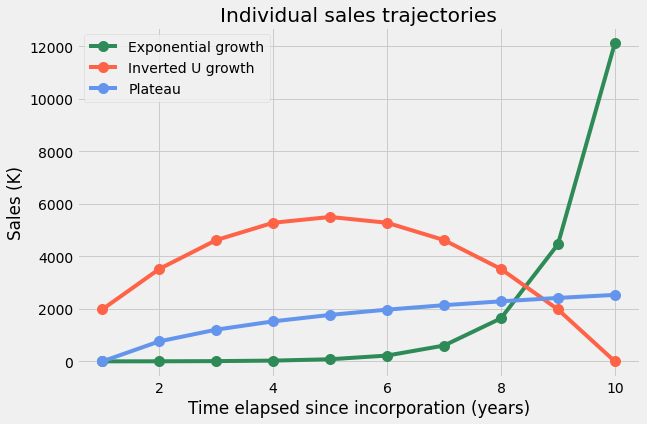

In [23]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
# ax0 = fig.add_subplot(3, 1, 1)
# ax1 = fig.add_subplot(3, 1, 2)
# ax2 = fig.add_subplot(3, 1, 3)
ax = fig.add_subplot(1, 1, 1)

# plot data
x = np.arange(1, 11, 1)

y_e = [0.55 * np.exp(i) for i in np.arange(1, 11, 1)]
ax.plot(x, y_e, color='seagreen', alpha=1, marker='o', markersize=10, label='Exponential growth')
    
y_u = [0.55 * (b1 * x + b2 * x ** 2) for x in np.arange(1, 11, 1)]
ax.plot(x, y_u, color='tomato', alpha=1, marker='o', markersize=10, label='Inverted U growth')

y_l = [0.55 * (b * np.log(x)) for x in np.arange(1, 11, 1)]
ax.plot(x, y_l, color='cornflowerblue', alpha=1, marker='o', markersize=10, label='Plateau')


# legend
ax.legend(loc='best')

# title
ax.set_title('Individual sales trajectories')

# axes
ax.set_xlabel('Time elapsed since incorporation (years)')
ax.set_ylabel('Sales (K)')
        
# show plot
plt.show()

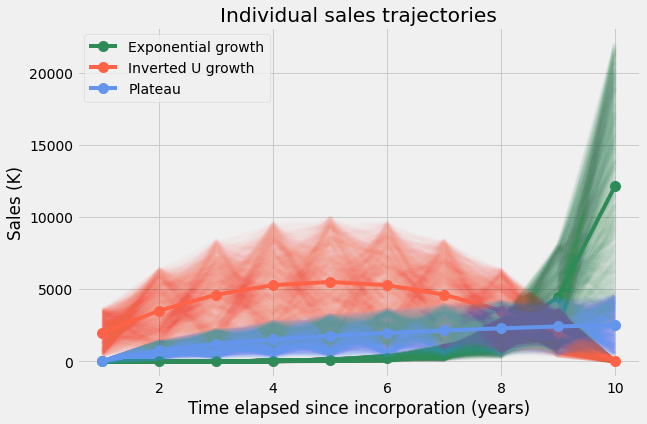

In [24]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
# ax0 = fig.add_subplot(3, 1, 1)
# ax1 = fig.add_subplot(3, 1, 2)
# ax2 = fig.add_subplot(3, 1, 3)
ax = fig.add_subplot(1, 1, 1)

# plot data
x = np.arange(1, 11, 1)

for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'e')]['r'].values
    ax.plot(x, y_obs, color='seagreen', alpha=0.01)
    

y_e = [0.55 * np.exp(i) for i in np.arange(1, 11, 1)]
ax.plot(x, y_e, color='seagreen', alpha=1, marker='o',markersize=10, label='Exponential growth')
    

for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'u')]['r'].values
    ax.plot(x, y_obs, color='tomato', alpha=0.01)
    

y_u = [0.55 * (b1 * x + b2 * x ** 2) for x in np.arange(1, 11, 1)]
ax.plot(x, y_u, color='tomato', alpha=1, marker='o', markersize=10, label='Inverted U growth')
    

for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'l')]['r'].values
    ax.plot(x, y_obs, color='cornflowerblue', alpha=0.01)


y_l = [0.55 * (b * np.log(x)) for x in np.arange(1, 11, 1)]
ax.plot(x, y_l, color='cornflowerblue', alpha=1, marker='o', markersize=10, label='Plateau')


# title
ax.set_title('Individual sales trajectories')

# legend
ax.legend(loc='best')

# axes
ax.set_xlabel('Time elapsed since incorporation (years)')
ax.set_ylabel('Sales (K)')
        
# show plot
plt.show()

# Representing cross-sections and trajectories (1 out of 2)

![](images/miotto_altman.png)

# Representing cross-sections and trajectories (2 out of 2)
![](images/youtube_popularity.png)

Notes: Dynamics of views in YouTube. Colored
histograms : distributions of views at fixed times after publication (0.3
million videos from our database).Gray lines at the bottom: trajectories of 120
videos which had the same early success (50 views 2 days after publication).
Black histogram: distribution of views of the 120 selected videos 2 months after
publication.


# Representing sequences of events

**How sequences matter?**

- actors (being individuals, organizations, or communities) are characterized by
'states'
- in several fields (e.g., labor economics), it is extremely relevant
to appreciate:
    + when units change 'state' (e.g., training $\rightarrow$
employment)
    + how often units change 'state'
    + typical sequences in
terms of frequency and timing of change

## Special case: Social sequence analysis

![](images/index.jpg)


In [34]:
%%R

#####################################################################
#   R code for the TraMiner program
#####################################################################

# library
#install.packages('TraMineR')
library(TraMineR)

# load sample data
data(mvad)
seqstatl(mvad[, 17:86])

# create a state sequence object to which we assign, for later usage
# short state names for printed output and long state labels for the legend in graphics
mvad.alphabet <- c("employment", "FE", "HE", "joblessness", "school", 
    "training")
mvad.labels <- c("employment", "further education", "higher education", 
    "joblessness", "school", "training")
mvad.scodes <- c("EM", "FE", "HE", "JL", "SC", "TR")
mvad.seq <- seqdef(mvad, 17:86, alphabet = mvad.alphabet, states = mvad.scodes, 
    labels = mvad.labels, xtstep = 6)

# plot the sequence
par(mfrow = c(2, 2))

seqiplot(mvad.seq, with.legend = FALSE, border = NA)
seqIplot(mvad.seq, sortv = "from.start", with.legend = FALSE)
seqfplot(mvad.seq, with.legend = FALSE, border = NA)
seqlegend(mvad.seq)

R[write to console]: Error in library(TraMineR) : there is no package called ‘TraMineR’




Error in library(TraMineR) : there is no package called ‘TraMineR’


## Output of TraMineR

![](images/traminer.png)

# Representing connections among events

# A role model visualization

![](images/moody_mucha.png)

Source: Moody and
Mucha [2013 - Network Science (the journal)]
